# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from prepare import git_df, code_language
from acquire import git_data
from formating import bold, display, Latex, Markdown, percent, Percent, strike, underline
from textblob import TextBlob
from wordcloud import WordCloud
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [2]:
df = git_df()

In [3]:
df[df.language.isnull() == True]

,index,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean


In [4]:
df

,index,repo,language,original,clean,stemmed,lemmatized,original_length,true_clean
0,0,0voice/interview_internal_reference,Python,\n## 2021年最新总结，阿里，腾讯，百度，美团，头条等技术面试题目，以及答案，专家出题...,mysql redis mongodb zookeeper nginx cpu idh ea...,mysql redi mongodb zookeep nginx cpu idh eaebd...,mysql redis mongodb zookeeper nginx cpu idh ea...,37402,mysql redis mongodb zookeeper nginx sqrt sqrt ...
1,1,2dust/v2rayN,C#,"# v2rayN\nA V2Ray client for Windows, support ...",vrayn vray client windows support xray corehtt...,vrayn vray client window support xray corehttp...,vrayn vray client window support xray corehttp...,1371,vrayn vray client window support xray core com...
2,2,30-seconds/30-seconds-of-code,JavaScript,[![Logo](/logo.png)](https://30secondsofcode.o...,logologopnghttpssecondsofcodeorgjsp seconds co...,logologopnghttpssecondsofcodeorgjsp second cod...,logologopnghttpssecondsofcodeorgjsp second cod...,1931,logo logo secondsofcod orgjsp second code shor...
3,3,521xueweihan/HelloGitHub,Python,"<p align=""center"">\n <img src=""https://cdn.js...",aligncenter srchttpscdnjsdelivrnetghxueweihani...,aligncent srchttpscdnjsdelivrnetghxueweihanimg...,aligncenter srchttpscdnjsdelivrnetghxueweihani...,5152,aligncenter srchttps jsdelivr netghxueweih ani...
4,4,Airblader/i3,C,[![Build Status](https://github.com/Airblader/...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,build statushttpsgithubcomairbladeriactionswor...,4737,build status comairblader iactionswork flowsma...
...,...,...,...,...,...,...,...,...,...
595,596,yuzu-emu/yuzu,C++,<!--\nSPDX-FileCopyrightText: 2018 yuzu Emulat...,spdxfilecopyrighttext yuzu emulator project sp...,spdxfilecopyrighttext yuzu emul project spdxli...,spdxfilecopyrighttext yuzu emulator project sp...,4460,spdx filecopyrigh ttext yuzu emulator project ...
596,597,zealdocs/zeal,C++,# Zeal\n\n[![Changelog](https://img.shields.io...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,zeal changeloghttpsimgshieldsiogithubreleaseze...,3166,zeal changelog shield iogithubrele asezealdocs...
597,598,zergtant/pytorch-handbook,Jupyter Notebook,# PyTorch 中文手册（pytorch handbook）\r\n![pytorch]...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,pytorch pytorch handbook pytorchpytorchlogodar...,3472,pytorch pytorch handbook pytorch pytorch logo ...
598,599,zero-to-mastery/start-here-guidelines,Python,Guidelines on how this open-source community w...,guidelines opensource community works read see...,guidelin opensourc commun work read see join e...,guideline opensource community work read see j...,7483,guideline open source community work read join...


In [5]:
# df = git_df()
python = code_language(words= ' '.join(df[df.language == 'Python'].true_clean), label= 'Python')
html = code_language(words= ' '.join(df[df.language == 'HTML'].true_clean), label= 'HTML')
c = code_language(words= ' '.join(df[df.language == 'C'].true_clean), label= 'C')
cplusplus = code_language(words= ' '.join(df[df.language == 'C++'].true_clean), label= 'C++')
php = code_language(words= ' '.join(df[df.language == 'PHP'].true_clean), label= 'PHP')
other = code_language(words= ' '.join(df[(df.language == 'C#' )|\
                                         (df.language == 'Java')|\
                                         (df.language == 'Jupyter Notebook')|\
                                         (df.language == 'Typescript')|\
                                         (df.language == 'JavaScript')].true_clean), label= 'Other')

languages = [python, html, c, cplusplus, php, other]

In [6]:
# from string import ascii_lowercase
# from itertools import product

# letters = []

# for length in range(1, 3):
#     for combo in product(ascii_lowercase, repeat=length):
#         letters.append(''.join(combo))

In [7]:
# df['true_clean'].str.findall('\w{,12}').str.join(' ').str.findall('\w{4,}').str.join(' ')

In [8]:
# from textblob import TextBlob
# #Type in the incorrect spelling
# a = "Thers otther thangs int heer"
# print("original text: "+str(a))
# b = TextBlob(a)
# #Obtain corrected spelling as an output
# print("corrected text: "+str(b.correct()))

In [9]:
# str(TextBlob(df.true_clean[1]).correct())

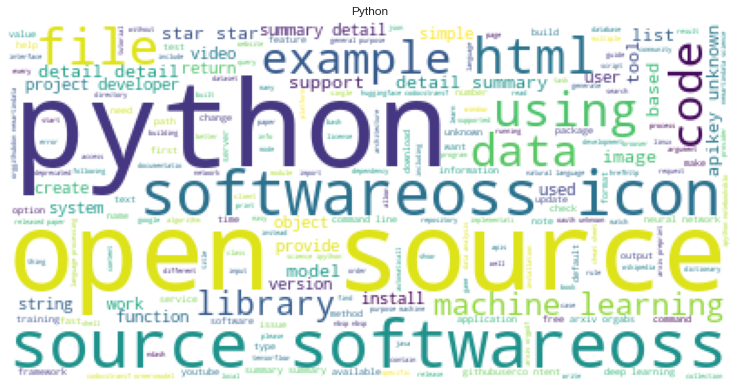

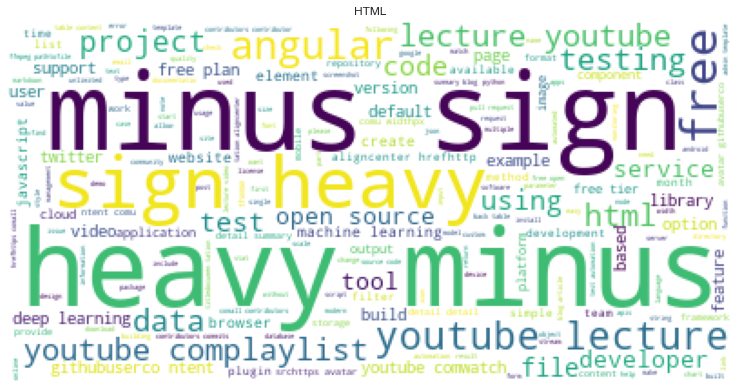

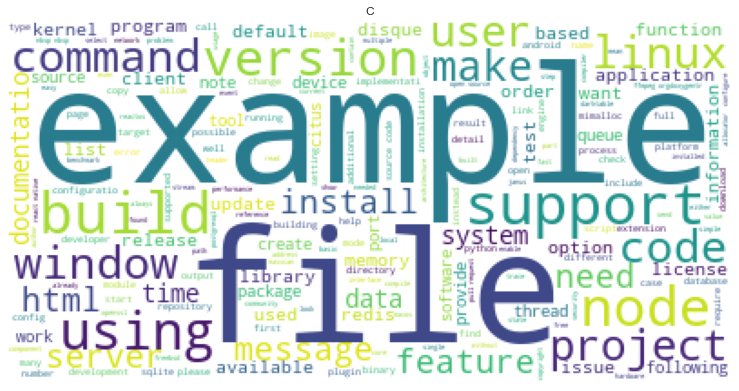

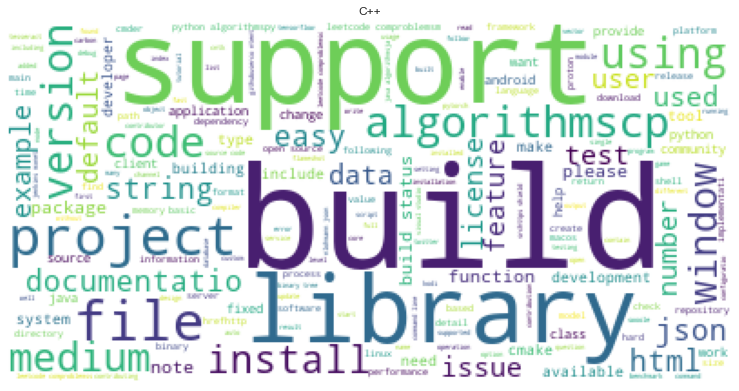

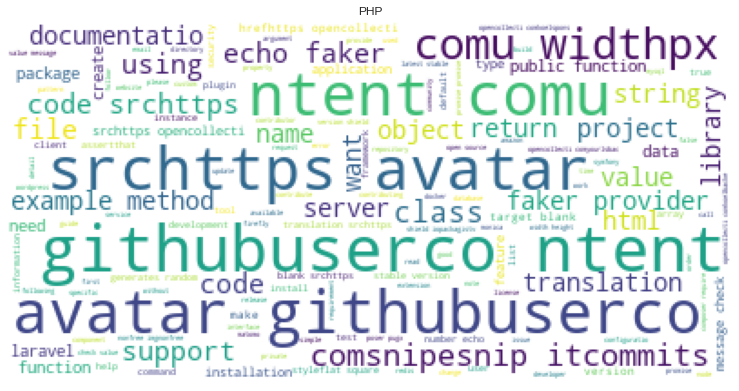

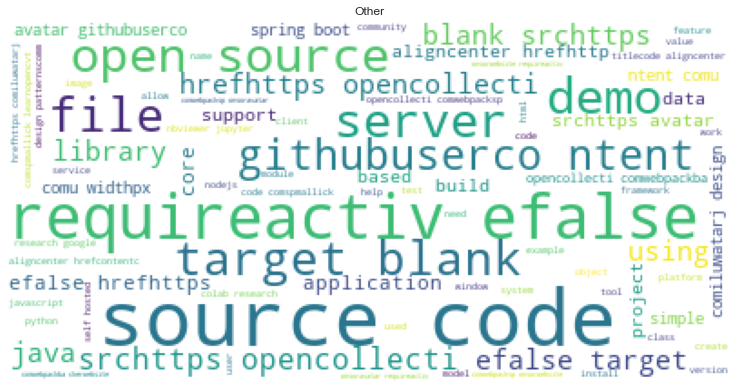

In [10]:
for l in languages:
    
    img = WordCloud(background_color= 'white')\
    .generate(l.words)
    
    plt.imshow(img)
    plt.axis('off')
    plt.title(l.label)
    plt.show()